In [144]:
import pandas as pd
import numpy as np
import random
import math
import operator
from math import sqrt
from random import shuffle
from decimal import Decimal
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import cov
from numpy.linalg import eig
import heapq

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

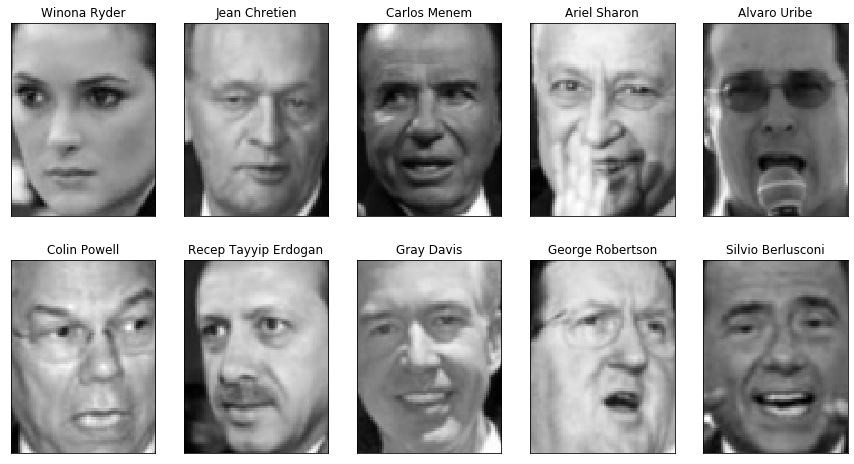

In [3]:
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [4]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [5]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end= '')
    if (i + 1)%3 == 0:
        print()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

In [6]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [17]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print(X_train)
print(y_train.shape)

y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_train_y= np.append(X_train, y_train, axis=1 )
y_test= np.reshape(y_test, (y_test.shape[0], 1))
X_test_y= np.append(X_test, y_test, axis=1 )
print(X_train_y.shape)
print(X_test_y.shape)

[[0.53594774 0.55947715 0.5647059  ... 0.5294118  0.40392157 0.24313726]
 [0.08888888 0.08627451 0.08888888 ... 0.38039216 0.43529412 0.4614379 ]
 [0.55424833 0.5464052  0.5411765  ... 0.84575164 0.8352941  0.793464  ]
 ...
 [0.4627451  0.4379085  0.40261436 ... 0.36732024 0.3647059  0.35816994]
 [0.14117648 0.20130718 0.18431373 ... 0.5673203  0.75032675 0.88366014]
 [0.04313726 0.02614379 0.01830065 ... 0.56601304 0.5869281  0.59607846]]
(1547,)
(1547, 5656)
(516, 5656)


In [9]:
X_mean = X_train.mean(axis=0)
#print(X_mean)
X_std = X_train.std(axis=0)
#print(X_std)
#print(X.T)
X_train_std = np.asarray([(X_train.T[i]-X_mean[i])/X_std[i] for i in range(X_train.T.shape[0])]).T
print(X_train_std.shape)

(1547, 5655)


In [62]:
#X_cov = cov(X_train_std)
X_cov = cov(X_train_std.T)
print(X_cov.shape)
eig_values, eig_vectors = eig(X_cov)

eig_values = np.real(eig_values)
eig_vectors = np.real(eig_vectors)
print(eig_values.shape)
print(eig_vectors.shape)


(5655, 5655)
(5655,)
(5655, 5655)
(1547, 5655)
(1547, 5655)


In [70]:
##PCA
print(X_train.shape)
projected_vector_test = eig_vectors.T.dot(X_test.T)
print(projected_vector_test.T.shape)
projected_vector_train = eig_vectors.T.dot(X_train.T)
print(projected_vector_train.T.shape)

(1547, 5655)
(516, 5655)
(1547, 5655)


In [20]:
normalized_eig_vectors = preprocessing.normalize(eig_vectors)
print(normalized_eig_vectors.shape)

(5655, 5655)


[0, 1]
(5655, 2)
(1547, 2)


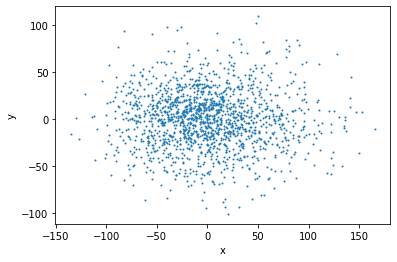

1014
778
217
1533


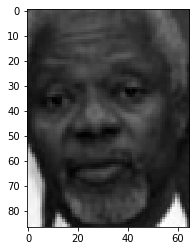

In [169]:
###find max and min image: revisit and check

print(heapq.nlargest(2, range(len(eig_values)), key=eig_values.__getitem__))
D_eig_vector = normalized_eig_vectors[:,0:2]
print(D_eig_vector.shape)


projected_D_train = X_train_std.dot(D_eig_vector)
print(projected_D_train.shape)
plt.scatter(projected_D_train[:,0],projected_D_train[:,1], s =1)
#colors = (0,0,0)
#area = np.pi*3
#plt.scatter(projected_D_train[:,1], projected_D_train[:,0], s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

max_PCone = np.argmax(projected_D_train [:,0])
print(max_PCone)
min_PCone = np.argmin(projected_D_train [:,0])
print(min_PCone)
max_PCtwo = np.argmax(projected_D_train [:,1])
print(max_PCtwo)
min_PCtwo = np.argmin(projected_D_train [:,1])
print(min_PCtwo)

plt.imshow(X_train[max_PCone,:].reshape(87,65),cmap='gray')




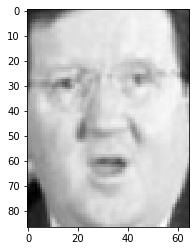

In [159]:
plt.imshow(X_train[min_PCone,:].reshape(87,65),cmap='gray')

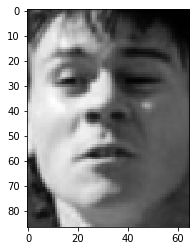

In [160]:
plt.imshow(X_train[max_PCtwo,:].reshape(87,65),cmap='gray')

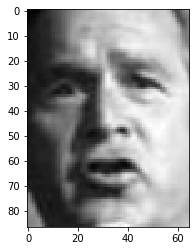

In [161]:
plt.imshow(X_train[min_PCtwo,:].reshape(87,65),cmap='gray')

0
(5655,)


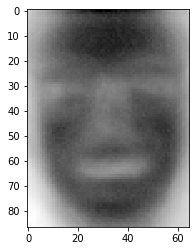

In [55]:
#Visualize most important PC 
most_important_PC = np.argmax(eig_values)
print(most_important_PC)
most_important_PC_vec = np.asarray(normalized_eig_vectors[:,most_important_PC])
print(most_important_PC_vec.shape)
plt.imshow(most_important_PC_vec.reshape(87,65),cmap='gray')


(1, 5655)
(5655, 1)
(1, 1)
(1, 5655)


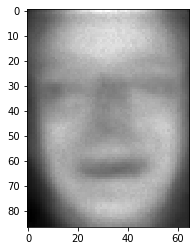

In [98]:
###Full reconstruction
##De standardize:
X_mean = X_train.mean(axis=0)
#print(X_mean)
X_std = X_train.std(axis=0)
#print(X_std)
#print(X.T)
X_train_one = np.asarray([(X_train_std[0,:].T[i]*X_std[i]) + X_mean[i] for i in range(X_train.T.shape[0])]).T

X_train_one = np.reshape(X_train_one, (1, X_train_one.shape[0]))
print(X_train_one.shape)
most_important_PC_vec = np.reshape(most_important_PC_vec, (most_important_PC_vec.shape[0],1))
print(most_important_PC_vec.shape)
#projected_vector_train= projected_vector_train.T
#print(projected_vector_train.shape)
#reconstruct = projected_vector_train.dot(most_important_PC_vec.T)
project = X_train_one.dot(most_important_PC_vec)
reconstruct = project.dot(most_important_PC_vec.T)
print(project.shape)
print(reconstruct.shape)
plt.imshow(reconstruct.reshape(87,65),cmap='gray')

In [114]:
##Pick only first k dimensions
print(np.sum(eig_values))
print(eig_values.shape)
threshold = 0.95
sum = 0
for i in range (len(eig_values)):
    sum += eig_values[i]
    if (sum/np.sum(eig_values))>=threshold:
        k = i
        break

print(k)

5658.657948695395
(5655,)
188


(5655, 188)


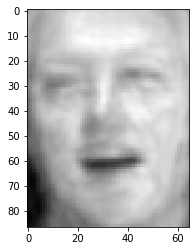

In [127]:
####only k eigen vectors
#reduced_vector = normalized_eig_vectors[:,0:k]
reduced_vector = eig_vectors[:,0:k]
print(reduced_vector.shape)
project_k = X_train_one.dot(reduced_vector)
reconstruct_k = project_k.dot(reduced_vector.T)
plt.imshow(reconstruct_k.reshape(87,65),cmap='gray')

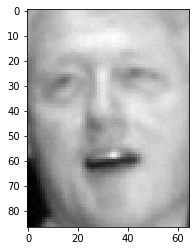

In [128]:
###all eigen vectors
#project_all = X_train_one.dot(normalized_eig_vectors)
#reconstruct_all = project_all.dot(normalized_eig_vectors.T)
project_all = X_train_one.dot(eig_vectors)
reconstruct_all = project_all.dot(eig_vectors.T)
plt.imshow(reconstruct_all.reshape(87,65),cmap='gray')